In [1]:
# Visualize the Wandb Results

In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import pathlib

from datetime import datetime
import dataframe_image as dfi

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
# Get the results file
CSV_FILE = '/Users/kimathikaai/Downloads/NIPS2024 - wandb-results-v3.csv'
# Get the pandas dataframe
df = pd.read_csv(CSV_FILE)
print(f"{len(df) = }, {df.columns = }")
df

len(df) = 216, df.columns = Index(['Name', 'ID', 'State', 'hyper-parameters.pretrain_path',
       'hyper-parameters.pretrain_type', 'hyper-parameters.img_dirs',
       'hyper-parameters.epochs', 'hyper-parameters.train_data_ratio',
       'hyper-parameters.seed', 'test_BinaryJaccardIndex',
       'test_BinaryF1Score', 'test_BinaryPrecision', 'test_BinaryRecall',
       'test_Dice'],
      dtype='object')


,Name,ID,State,hyper-parameters.pretrain_path,hyper-parameters.pretrain_type,hyper-parameters.img_dirs,hyper-parameters.epochs,hyper-parameters.train_data_ratio,hyper-parameters.seed,test_BinaryJaccardIndex,test_BinaryF1Score,test_BinaryPrecision,test_BinaryRecall,test_Dice
0,240908162432-CVC-ClinicDB-BYOL-R0.3-S0-POLYP,sfy2eciy,finished,/mnt/pub1/ssl-pretraining/logs/240816170945-pr...,PretrainType.BYOL,"[""/mnt/pub1/ssl-pretraining/data/CVC-ClinicDB/...",100,0.3,0,0.804815,0.891853,0.938387,0.849717,0.891853
1,240907084533-ETIS-LaribPolypDB-PROPOSED-R0.6-S...,x1h591q6,finished,/mnt/pub1/ssl-pretraining/logs/240905185852-pr...,PretrainType.PROPOSED,"[""/mnt/pub1/ssl-pretraining/data/ETIS-LaribPol...",100,0.6,2,0.755555,0.860759,0.897620,0.826806,0.860759
2,240907084305-ETIS-LaribPolypDB-PROPOSED-R0.6-S...,w8i4e6uq,finished,/mnt/pub1/ssl-pretraining/logs/240905185852-pr...,PretrainType.PROPOSED,"[""/mnt/pub1/ssl-pretraining/data/ETIS-LaribPol...",100,0.6,1,0.788802,0.881933,0.956705,0.818002,0.881933
3,240907084048-ETIS-LaribPolypDB-PROPOSED-R0.6-S...,l6jy8x2m,finished,/mnt/pub1/ssl-pretraining/logs/240905185852-pr...,PretrainType.PROPOSED,"[""/mnt/pub1/ssl-pretraining/data/ETIS-LaribPol...",100,0.6,0,0.798912,0.888217,0.958512,0.827528,0.888217
4,240907083901-ETIS-LaribPolypDB-PROPOSED-R0.3-S...,mzz24g6p,finished,/mnt/pub1/ssl-pretraining/logs/240905185852-pr...,PretrainType.PROPOSED,"[""/mnt/pub1/ssl-pretraining/data/ETIS-LaribPol...",100,0.3,2,0.643566,0.783134,0.848457,0.727150,0.783134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,240906131448-CVC-ClinicDB-NONE-R1.0-S1-POLYP,gd7fmb4x,finished,Finetune-Only,PretrainType.NONE,"[""/mnt/pub1/ssl-pretraining/data/CVC-ClinicDB/...",100,1.0,1,0.879557,0.935919,0.943906,0.928067,0.935919
212,240906130744-CVC-ClinicDB-NONE-R1.0-S0-POLYP,2h9214op,finished,Finetune-Only,PretrainType.NONE,"[""/mnt/pub1/ssl-pretraining/data/CVC-ClinicDB/...",100,1.0,0,0.858234,0.923709,0.930008,0.917495,0.923709
213,240906125727-Kvasir-SEG-NONE-R1.0-S2-POLYP,bii3015j,finished,Finetune-Only,PretrainType.NONE,"[""/mnt/pub1/ssl-pretraining/data/Kvasir-SEG/Im...",100,1.0,2,0.846014,0.916584,0.931951,0.901716,0.916584
214,240906124710-Kvasir-SEG-NONE-R1.0-S1-POLYP,onpwygll,finished,Finetune-Only,PretrainType.NONE,"[""/mnt/pub1/ssl-pretraining/data/Kvasir-SEG/Im...",100,1.0,1,0.864868,0.927538,0.925033,0.930056,0.927538


In [4]:
# Create the global pivot table. Counts should be 3 for 3 seeds
def get_pivot(data):
    return pd.pivot_table(
        data=data, 
        values=['test_BinaryJaccardIndex'], 
        index=['hyper-parameters.train_data_ratio', 'hyper-parameters.pretrain_type', 'hyper-parameters.pretrain_path'], 
        columns=['hyper-parameters.img_dirs'], aggfunc=["mean", 'std', 'count'], margins=True)
        # aggfunc=["max","std", "count"]
    
def get_ratio_pivot(data):
    return pd.pivot_table(
        data=data, 
        values=['test_BinaryJaccardIndex'], 
        index=['hyper-parameters.pretrain_type', 'hyper-parameters.pretrain_path'], 
        columns=['hyper-parameters.train_data_ratio'], aggfunc=["mean","std", "count"], margins=True).style.background_gradient()

get_pivot(df)

mean  \
                                                                                                                                                   test_BinaryJaccardIndex   
hyper-parameters.img_dirs                                                                                           ["/mnt/pub1/ssl-pretraining/data/CVC-ClinicDB/Images"]   
hyper-parameters.train_data_ratio hyper-parameters.pretrain_type hyper-parameters.pretrain_path                                                                              
0.3                               PretrainType.BYOL              /mnt/pub1/ssl-pretraining/logs/240816170945-pre...                                           0.835575       
                                  PretrainType.CP2               /mnt/pub1/ssl-pretraining/logs/240816040556-pre...                                           0.827348       
                                  PretrainType.MOCO              /mnt/pub1/ssl-pretraining/logs/240816115548-pre...                                           0.809318       
                                  PretrainType.NONE              Finetune-Only                                                                                0.780207       
                                  PretrainType.PIXPRO            /mnt/pub1/ssl-pretraining/logs/240902172247-Pix...                                           0.646656       
                                  PretrainType.PROPOSED          /mnt/pub1/ssl-pretraining/logs/240905185852-pre...                                           0.832356       
0.6                               PretrainType.BYOL              /mnt/pub1/ssl-pretraining/logs/240816170945-pre...                                           0.863010       
                                  PretrainType.CP2               /mnt/pub1/ssl-pretraining/logs/240816040556-pre...                                           0.846187       
                                  PretrainType.MOCO              /mnt/pub1/ssl-pretraining/logs/240816115548-pre...                                           0.844287       
                                  PretrainType.NONE              Finetune-Only                                                                                0.856658       
                                  PretrainType.PIXPRO            /mnt/pub1/ssl-pretraining/logs/240902172247-Pix...                                           0.696476       
                                  PretrainType.PROPOSED          /mnt/pub1/ssl-pretraining/logs/240905185852-pre...                                           0.831542       
1.0                               PretrainType.BYOL              /mnt/pub1/ssl-pretraining/logs/240816170945-pre...                                           0.862156       
                                  PretrainType.CP2               /mnt/pub1/ssl-pretraining/logs/240816040556-pre...                                           0.864702       
                                  PretrainType.MOCO              /mnt/pub1/ssl-pretraining/logs/240816115548-pre...                                           0.864474       
                                  PretrainType.NONE              Finetune-Only                                                                                0.870510       
                                  PretrainType.PIXPRO            /mnt/pub1/ssl-pretraining/logs/240902172247-Pix...                                           0.762882       
                                  PretrainType.PROPOSED          /mnt/pub1/ssl-pretraining/logs/240905185852-pre...                                           0.875088       
All                                                                                                                                                           0.820524       

                                                                                                                                                                   

In [5]:
df['hyper-parameters.pretrain_path'].unique()

array(['/mnt/pub1/ssl-pretraining/logs/240816170945-pretrain-BYOL-POLYP/checkpoint.ckpt',
       '/mnt/pub1/ssl-pretraining/logs/240905185852-pretrain-PROPOSED-POLYP/checkpoint.ckpt',
       '/mnt/pub1/ssl-pretraining/logs/240902172247-PixPro/checkpoint.ckpt',
       '/mnt/pub1/ssl-pretraining/logs/240816115548-pretrain-MOCO-POLYP/checkpoint.ckpt',
       '/mnt/pub1/ssl-pretraining/logs/240816040556-pretrain-CP2-POLYP/checkpoint.ckpt',
       'Finetune-Only'], dtype=object)

### Data Efficiency % with Polyp Pre-Training

In [6]:
data = df.loc[
    (df['hyper-parameters.train_data_ratio'].isin([0.3]))
    &(df['hyper-parameters.pretrain_path'].str.contains('IMAGENET')==False)
    &(df['hyper-parameters.pretrain_type'].str.contains('OLD')==False) # Ignore old results
    # &(df['hyper-parameters.img_dirs'].isin(
    #     [
    #         '["/mnt/pub1/ssl-pretraining/data/Kvasir-SEG/Images"]', 
    #         '["/mnt/pub1/ssl-pretraining/data/CVC-ClinicDB/Images"]',
    #         '["/mnt/pub1/ssl-pretraining/data/ETIS-LaribPolypDB/Images"]'
    #     ]))
]
get_pivot(data).style.background_gradient()

In [7]:
# Using groupby
dataset = '["/mnt/pub1/ssl-pretraining/data/Kvasir-SEG/Images"]'
method = 'PretrainType.BYOL'
data = df.loc[
    (df['hyper-parameters.pretrain_path'].str.contains('IMAGENET')==False) # Ignore imagenet pre-training
    # &(df['hyper-parameters.pretrain_type']==method)
    &(df['hyper-parameters.pretrain_type'].str.contains('OLD')==False) # Ignore old results
    # &(df['hyper-parameters.img_dirs']==dataset)
]
pivot = get_ratio_pivot(data)
pivot

AssertionError: 

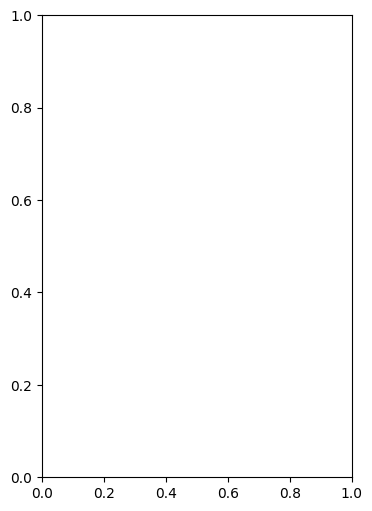

In [8]:
# Plot the pivot table
data = df.loc[
    (df['hyper-parameters.pretrain_path'].str.contains('IMAGENET')==False) # Ignore imagenet pre-training
    &(df['hyper-parameters.pretrain_type'].str.contains('OLD')==False) # Ignore old results
]
datasets = data['hyper-parameters.img_dirs'].unique()
methods = data['hyper-parameters.pretrain_type'].unique()
BASE_COLORS = [
    "red",
    "darkviolet",
    "orange",
    "cornflowerblue",
    "limegreen",
    "darkgrey",
    "pink",
    'blue',
    'limegreen',
    'magenta'
]

# Iterate through each dataset
for dataset in datasets:
    fig, ax = plt.subplots(figsize=(4,6))
    for i, method in enumerate(methods):
        # print(f"{dataset = }, {method = }")
        pivot = get_pivot(
            df.loc[
                (df['hyper-parameters.pretrain_path'].str.contains('IMAGENET')==False) # Ignore imagenet pre-training
                &(df['hyper-parameters.pretrain_type']==method)
                &(df['hyper-parameters.img_dirs']==dataset)
            ]
        )
        values = pivot.values
        # print(f"{values = }")
        index = pivot.index.values
        columns = pivot.columns.values

        ious = values[:,0]
        std = values[:,1]
        counts = values[:,2]
        ratios = [x[0] for x in index]
        assert counts[0] == 3

        # plot
        ax.errorbar(ratios, ious, yerr=std, color=BASE_COLORS[i], elinewidth=0.5, capsize=2, zorder=5)
        ax.plot(ratios, ious, label=method, zorder=10,c=BASE_COLORS[i], marker='.')
        ax.set_title(f"{method = }, {dataset = }")
    # Legend
    fig.legend(
        title="Methods",
        loc='center left',
        bbox_to_anchor=(1, 0.5)
    )

### Save

In [ ]:
datetime.now().strftime('%d%m%Y%H%M%S')

In [ ]:
# help(dfi.export)

In [ ]:
if True:
    now = datetime.now().strftime('%d%m%Y%H%M%S')
    # now = '03092024092120'
    df.to_csv(f"wandb-{now}.csv", index=False)
    dfi.export(
        get_pivot(df), 
        f"pivot-{now}.png",
        max_rows=-1,
        max_cols=-1,
        dpi=400,
        # table_conversion='matplotlib'
    )
get_pivot(df)

### Interfacing with Pivot Tables

In [ ]:
dir(pivot)

In [ ]:
pivot.values

In [ ]:
pivot.index.values

In [ ]:
pivot.columns.values